In [ ]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
train,test = pd.read_csv('Train.csv'),pd.read_csv('Test.csv')
sample_sub  = pd.read_csv('SampleSubmission.csv')

In [ ]:
train.head()

In [ ]:
train.shape,test.shape

In [ ]:
train['Amount (Million Naira)'].fillna(train['Amount (Million Naira)'].median() , inplace = True)

y = train.pop('Amount (Million Naira)')

In [ ]:
all = pd.concat([train,test], ignore_index = True)

all.Year = all.Year.str.replace(',','')
all.Year = all.Year.astype(float)
all.Distance  = all.Distance.str.replace(',','')
all.Distance = all.Distance.astype(float)


In [ ]:
all.Year.fillna(2011.0, inplace = True)


In [7]:
all.Type.fillna('Foreign Used', inplace=True)

In [8]:
all.isna().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [10]:
cat_cols = train.select_dtypes(include = 'object').columns
num_cols = train.select_dtypes(exclude = 'object').columns

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder , StandardScaler
from scipy import stats
from sklearn.preprocessing import power_transform


lb_Model  = LabelEncoder()
all.Model = lb_Model.fit_transform(all.Model)

lb_Colour = LabelEncoder()
all.Colour = lb_Colour.fit_transform(all.Colour)

lb_Maker = LabelEncoder()
all.Maker = lb_Maker.fit_transform(all.Maker)


In [12]:
all.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL12546,Abuja,17,142,2011.0,18,Nigerian Used,80830.0
1,VHL18827,Ibadan,19,1204,2012.0,18,Nigerian Used,125000.0
2,VHL19499,Lagos,29,1040,2010.0,17,Foreign Used,110852.0
3,VHL17991,Abuja,34,590,2017.0,3,Foreign Used,30000.0
4,VHL12170,Ibadan,53,659,2002.0,17,Nigerian Used,125206.0


In [13]:
all = pd.get_dummies(all, columns = ['Location', 'Type'], prefix = '' , prefix_sep = '')

In [14]:
all.Year.nunique()

35

In [15]:
scaler = StandardScaler()
all['z_score_distance'] = scaler.fit_transform(all[['Distance']]) 

In [16]:
all['log_distance'] = np.log(all['Distance'])

In [17]:
all['power_transform_distance'] = power_transform(all[['Distance']], method='box-cox')

In [18]:
all.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,z_score_distance,log_distance,power_transform_distance
0,VHL12546,17,142,2011.0,18,80830.0,1,0,0,0,0,1,-0.135602,11.300103,0.002545
1,VHL18827,19,1204,2012.0,18,125000.0,0,1,0,0,0,1,0.376490,11.736069,0.711677
2,VHL19499,29,1040,2010.0,17,110852.0,0,0,1,0,1,0,0.212463,11.615951,0.504982
3,VHL17991,34,590,2017.0,3,30000.0,1,0,0,0,1,0,-0.724908,10.308953,-1.247567
4,VHL12170,53,659,2002.0,17,125206.0,0,1,0,0,0,1,0.378878,11.737716,0.714574


In [19]:
train, test  = all.iloc[:7205], all.iloc[7205:]

In [20]:
train['Amount (Million Naira)'] = y

C:\Users\samuel\AppData\Local\Temp/ipykernel_8440/3998621924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Amount (Million Naira)'] = y


In [21]:
train['Amount (Million Naira)'] = train['Amount (Million Naira)'].astype(float)
train.corr()['Amount (Million Naira)']

C:\Users\samuel\AppData\Local\Temp/ipykernel_8440/1048719124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Amount (Million Naira)'] = train['Amount (Million Naira)'].astype(float)


Maker                      -0.050221
Model                       0.085003
Year                        0.452479
Colour                     -0.039097
Distance                   -0.139844
Abuja                       0.101138
Ibadan                     -0.090807
Lagos                      -0.049763
Brand New                   0.519044
Foreign Used               -0.029032
Nigerian Used              -0.171476
z_score_distance           -0.139844
log_distance               -0.283015
power_transform_distance   -0.270066
Amount (Million Naira)      1.000000
Name: Amount (Million Naira), dtype: float64

In [22]:
train.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,z_score_distance,log_distance,power_transform_distance,Amount (Million Naira)
0,VHL12546,17,142,2011.0,18,80830.0,1,0,0,0,0,1,-0.135602,11.300103,0.002545,2.2
1,VHL18827,19,1204,2012.0,18,125000.0,0,1,0,0,0,1,0.376490,11.736069,0.711677,3.5
2,VHL19499,29,1040,2010.0,17,110852.0,0,0,1,0,1,0,0.212463,11.615951,0.504982,9.2
3,VHL17991,34,590,2017.0,3,30000.0,1,0,0,0,1,0,-0.724908,10.308953,-1.247567,22.8
4,VHL12170,53,659,2002.0,17,125206.0,0,1,0,0,0,1,0.378878,11.737716,0.714574,2.6


<AxesSubplot:xlabel='z_score_distance'>

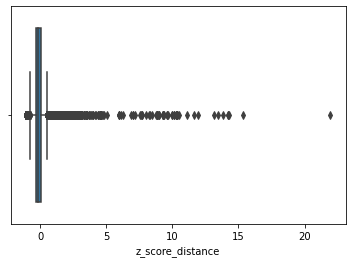

In [23]:
sns.boxplot(data = train, x = 'z_score_distance')

<AxesSubplot:xlabel='Amount (Million Naira)'>

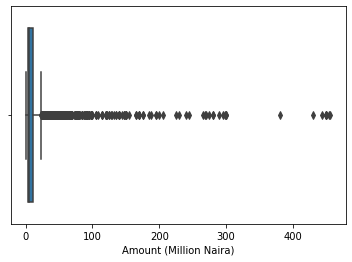

In [24]:
sns.boxplot(data = train, x = 'Amount (Million Naira)')

TODO: Try standardizing the numeric columns in the  data and see whether the results will be better

In [25]:
X = train.drop(columns  = ['Amount (Million Naira)', 'VehicleID'])
y = train['Amount (Million Naira)']

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state = 0)

In [27]:
from sklearn.metrics import mean_squared_error

models_to_use = {
    'linreg': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'gbdt': HistGradientBoostingRegressor(random_state =  0),
}


rmse = lambda x: mean_squared_error(y_valid, x, squared=False)

for name, est in models_to_use.items():
    print(f'Training With {name} model')
    est.fit(X_train, y_train)
    preds = est.predict(X_valid)
    print('Root Mean Squared Error:', rmse(preds))
    print('Cross-Validation RMSE:\n')
    cv_rmse = cross_val_score(est,X,y,cv=10,scoring='neg_root_mean_squared_error').mean()
    print(cv_rmse)
    
    print('\n\n')

Training With linreg model
Root Mean Squared Error: 20.995831489307363
Cross-Validation RMSE:

-19.57170128647777



Training With ridge model
Root Mean Squared Error: 21.00243993479669
Cross-Validation RMSE:

-19.5707646361397



Training With lasso model
Root Mean Squared Error: 22.83643028729295
Cross-Validation RMSE:

-20.51768116078388



Training With gbdt model
Root Mean Squared Error: 12.396358914171838
Cross-Validation RMSE:

-12.805484620773232





In [28]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [29]:
test.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,z_score_distance,log_distance,power_transform_distance
7205,VHL18518,3,27,2008.0,22,80830.0,1,0,0,0,1,0,-0.135602,11.300103,0.002545
7206,VHL17149,53,317,2013.0,22,80830.0,0,0,1,0,1,0,-0.135602,11.300103,0.002545
7207,VHL10927,53,674,2005.0,8,80830.0,0,0,1,0,1,0,-0.135602,11.300103,0.002545
7208,VHL12909,53,317,2011.0,9,80830.0,0,0,1,0,1,0,-0.135602,11.300103,0.002545
7209,VHL12348,29,484,2013.0,17,80830.0,0,0,1,0,1,0,-0.135602,11.300103,0.002545


In [30]:
test.shape

(2061, 15)

In [31]:
gbdt = HistGradientBoostingRegressor(random_state=0)
gbdt.fit(X_train, y_train)
gbdt_preds = gbdt.predict(X_valid)
rmse(gbdt_preds)

12.396358914171838

In [32]:

rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
rfpreds = rf.predict(X_valid)
rmse(rfpreds)

11.956288840835548

In [33]:
important_features = dict(zip(train.columns[1:],rf.feature_importances_))

In [34]:
important_features

{'Maker': 0.2009870199084312,
 'Model': 0.24564816494818775,
 'Year': 0.36920247087743946,
 'Colour': 0.04463746692405415,
 'Distance': 0.016206238281294565,
 'Abuja': 0.003809794842139508,
 'Ibadan': 5.0800485211827085e-05,
 'Lagos': 0.0031456699069180257,
 'Brand New': 0.05937007792929819,
 'Foreign Used': 0.00869733458385102,
 'Nigerian Used': 0.00211058014335497,
 'z_score_distance': 0.016258837469718197,
 'log_distance': 0.015777250901561127,
 'power_transform_distance': 0.014098292798539932}

In [35]:
train.shape

(7205, 16)

In [36]:
def save(model, filename):
    X_test = test.drop(columns=['VehicleID'])
    
    test_set_predictions = model.predict(X_test)
    sub_file = sample_sub.copy()
    sub_file['Amount (Million Naira)'] = test_set_predictions
    print(test_set_predictions[:10])
    sub_file.to_csv(filename, index=False)

In [37]:
train.head

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,z_score_distance,log_distance,power_transform_distance,Amount (Million Naira)
0,VHL12546,17,142,2011.0,18,80830.0,1,0,0,0,0,1,-0.135602,11.300103,0.002545,2.2
1,VHL18827,19,1204,2012.0,18,125000.0,0,1,0,0,0,1,0.376490,11.736069,0.711677,3.5
2,VHL19499,29,1040,2010.0,17,110852.0,0,0,1,0,1,0,0.212463,11.615951,0.504982,9.2
3,VHL17991,34,590,2017.0,3,30000.0,1,0,0,0,1,0,-0.724908,10.308953,-1.247567,22.8
4,VHL12170,53,659,2002.0,17,125206.0,0,1,0,0,0,1,0.378878,11.737716,0.714574,2.6


## Handling the outliers in The data